In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bhramarisarkar","key":"a9d685055a19994f691b0f5a8c5929f1"}'}

In [ ]:
import os
import shutil

# Make a Kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json to the correct location
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set permissions to prevent security warnings
os.chmod("/root/.kaggle/kaggle.json", 600)

In [ ]:
!kaggle datasets download -d shuvoalok/raf-db-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/shuvoalok/raf-db-dataset
License(s): other


In [ ]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input, decode_predictions
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [ ]:
import random
seed = random.randint(1, 1000)
print(seed)

784


In [ ]:
img_size = 100 #original size of the image
targetx = 100
targety = 100

epochs = 100
batch_size = 64

In [ ]:
train_dir = "DATASET/train"
test_dir = "DATASET/test"

In [ ]:
#Data Augmentation

train_datagen = ImageDataGenerator(
        rescale=1./255,
        brightness_range=[0.9,1.1],
        horizontal_flip=True,
        fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.5
)

In [ ]:
#Applying data augmentation to the images
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(targetx, targety),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True,
        seed=seed,

)
val_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(targetx, targety),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False,
        seed=seed,
     subset="training"

)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(targetx, targety),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False,
    subset="validation",
        seed=seed
)

Found 12271 images belonging to 7 classes.
Found 1535 images belonging to 7 classes.
Found 1533 images belonging to 7 classes.


In [ ]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(targetx,targety,3)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 100, 100, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 100, 100, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 50, 50, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 25, 25, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 25, 25, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,718,848 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 8,036,423 (30.66 MB)

 Trainable params: 8,032,455 (30.64 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [ ]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = val_generator)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


192/192 ━━━━━━━━━━━━━━━━━━━━ 62s 211ms/step - accuracy: 0.2743 - loss: 9.4092 - val_accuracy: 0.3863 - val_loss: 9.1385
Epoch 2/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - accuracy: 0.4641 - loss: 8.3404 - val_accuracy: 0.4971 - val_loss: 8.2921
Epoch 3/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 21s 108ms/step - accuracy: 0.5429 - loss: 7.5606 - val_accuracy: 0.5414 - val_loss: 7.3574
Epoch 4/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.6058 - loss: 6.8294 - val_accuracy: 0.6202 - val_loss: 6.2864
Epoch 5/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.6282 - loss: 6.2260 - val_accuracy: 0.6482 - val_loss: 5.8300
Epoch 6/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.6537 - loss: 5.6353 - val_accuracy: 0.6658 - val_loss: 5.1790
Epoch 7/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 21s 111ms/step - accuracy: 0.6754 - loss: 5.0951 - val_accuracy: 0.6958 - val_loss: 4.7516
Epoch 8/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.7111 - loss: 4.558

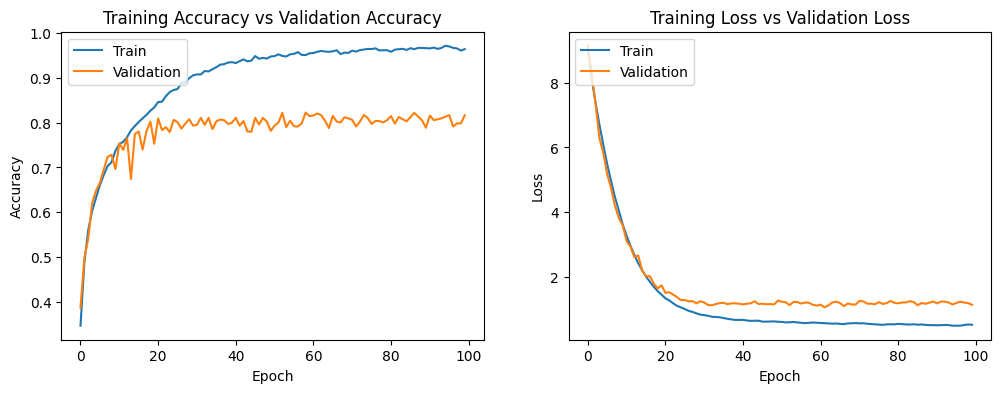

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

(100, 100, 3)


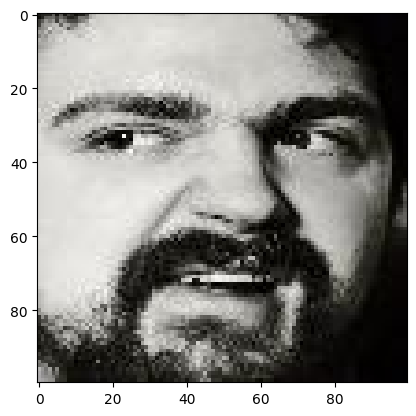

In [ ]:
import keras.utils as image
img = image.load_img("DATASET/test/3/test_0007_aligned.jpg",target_size = (targetx,targety,3))
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

In [ ]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [ ]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,targetx,targety,3)
result = model.predict(img)
result = list(result[0])
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[np.float32(0.0), np.float32(6.952969e-34), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(1.0), np.float32(0.0)]


In [ ]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Sad


In [ ]:
train_loss, train_acc = model.evaluate(train_generator)
val_loss, val_acc   = model.evaluate(val_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, val_acc*100))

192/192 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9940 - loss: 0.4583
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8232 - loss: 1.1561
final train accuracy = 99.41 , validation accuracy = 81.69


In [ ]:
test_loss, test_acc   = model.evaluate(test_generator)
print("final test accuracy = {:.2f}".format(test_acc*100))

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - accuracy: 0.7894 - loss: 1.4182
final test accuracy = 82.71


In [ ]:
model.save_weights('model.weights.h5')
model.save('model_optimal.h5')

In [ ]:
from google.colab import files
files.download('model.weights.h5')
files.download('model_optimal.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>